In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

companies = pd.read_csv('1000_Companies.csv')
X  = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


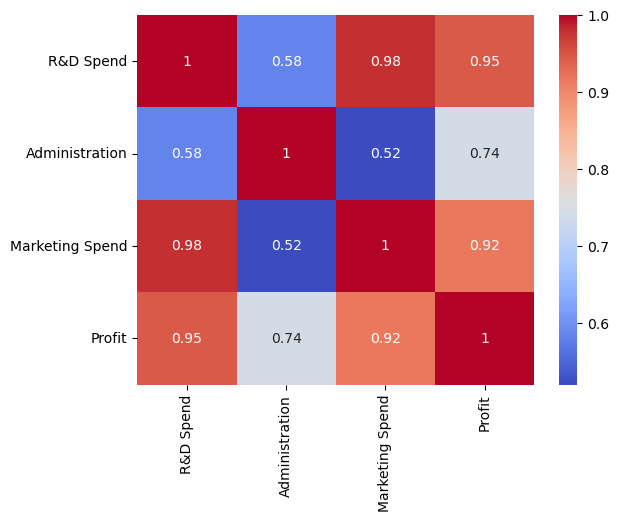

In [4]:
sns.heatmap(companies.select_dtypes(include = ["number"]).corr(), annot = True, cmap = "coolwarm")
plt.show()

In [15]:
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first', sparse_output=False), [3])
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)  

LinearRegression()

In [27]:
y_pred = regressor.predict(X_test)
y_pred

array([ 91197.96118639,  89940.77632286,  95903.89876942, 171122.37178207,
        86430.02778708, 111471.66087018, 162020.70308836,  92749.4648047 ,
       161282.76096773,  58216.26192449,  70139.12749177, 147966.91146947,
       125426.77440978,  63120.57113715, 172078.6934584 ,  78966.03740059,
       118169.49649911, 160148.4927425 , 198281.22496366, 177391.97376617,
       148965.18085195,  87398.71568784, 176019.77497498,  85992.78901077,
       105226.37096882, 101748.34420752,  67083.00171631,  61969.12098456,
        71933.52342324, 233854.46775023, 120502.6857351 , 111421.3089492 ,
       103096.23112781, 136342.89728771,  67391.35983202, 108777.97711962,
       181029.81845993, 167214.73439393, 170166.62641806, 117637.8234906 ,
        98710.72128194, 160957.8697167 , 107732.82852747,  55424.1882695 ,
       116570.52202502,  62470.22132214, 155204.62459348,  81560.02299692,
       156413.54736463, 130053.80883258, 179604.61077841, 170134.18818919,
        94844.50902375,  

In [31]:
print(regressor.coef_)

[ 6.42598144e-04 -5.53242471e+03 -4.74677692e+04 ...  3.39155540e+02
  2.11871291e+00  2.47876644e-01]


In [33]:
print(regressor.intercept_)

-196772.74343768682


In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9345435061011934